In this code I will be using Pytorch to implement a Multilayer Perceptron

# Importing libraries

In [19]:
import matplotlib.pyplot as plt

#importing root package
import torch

#importing vision dataset, tensor transforming function
from torchvision import transforms, datasets

#importing Module, layer types classes, activation function classes, loss funtions classes
import torch.nn as nn

#importing layer types function, activation functions, loss funtions
import torch.nn.functional as F

#importing optimizers
import torch.optim as optim

# Loading data
Loading data and transform them to tensors.<br>
Shuffling data and grouping data with batch-size

In [59]:
train = datasets.MNIST(root='', train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

training_data = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

Each iterator value in Training_Data is now a list of of two batch-size tensors, one tensor for data and one for their labels. Each tensor is an array which contains "batch-size" data.<br>
To access each batch data, run an iterative loop statement on Training_Data.<br>
Each data tensor has shape of (BATCH_SIZE=64, IMAGE_CHANNEL=1, IMAGE_WIDTH=28, IMAGE_HEIGHT=28).

In [60]:
for batch in training_data:
    training_data_tensor = batch[0]
    print(training_data_tensor.size())
    break

torch.Size([64, 1, 28, 28])


Printing a sample

label:  tensor(9)


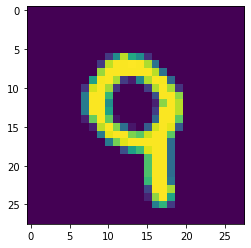

In [61]:
for batch in training_data:
    training_data_tensor, training_labels_tensor = batch
    print("label: ", training_labels_tensor[0] )
    plt.imshow(training_data_tensor[0].view(28,28))      #reshaping data with shape of (1,28,28) to (28,28)
    break

# Building a class for MLP model
The Net class inherits the constructor of nn.Module and defines it's own type of layers inside constructor. In this case, the net has 1 input layer, 3 fully connected layers and 1 output layer.<br>
The forward function defines the model architecture, how the data flow and the activation function of each layer.

In [66]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1,28*28)       #reshaping training_data_tensor with shape of(64,1,28,28) to (64,1,28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x))
        return x   

Compiling model using Adam optimizer and CrossEntropy loss function <br>
Setting learning rate

In [67]:
model = Net()

In [68]:
opt = optim.Adam(model.parameters(), lr=0.001)

# Feeding data and training the model

In [69]:
model.train()                             #setting model in training mode
for epoch in range(5):
    for data, labels in training_data:

        opt.zero_grad()                   #setting desire gradient to 0         
        prediction = model(data)          #feeding data to the model 
        
        loss = F.cross_entropy(prediction, labels)     #caculate the loss value
        loss.backward()                          # backprop
        opt.step()                               # update weight using optimizer
        
    print(loss) 

/home/hoan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor(0.1314, grad_fn=<NllLossBackward>)
tensor(0.1533, grad_fn=<NllLossBackward>)
tensor(0.0504, grad_fn=<NllLossBackward>)
tensor(0.0366, grad_fn=<NllLossBackward>)
tensor(0.0188, grad_fn=<NllLossBackward>)


# Evaluating the model's performance on test data

In [79]:
test_correct = 0
test_total = 10000
test_loss = 0

with torch.no_grad():                           #turning off gradient 
    model.eval()                                #setting model in evaluating mode
    for data, labels in test_data:
        
        prediction = model(data)
        
        test_loss += F.cross_entropy(prediction, labels).item()
        
        for idx, i in enumerate(prediction):
            if torch.argmax(i) == labels[idx]:         #if predicted one hot vector is equivalent to target label 
                test_correct += 1
            
print("Test loss: ", test_loss)    
print("Test accuracy: ", round(test_correct/test_total, 3))           
        


/home/hoan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


Test loss:  16.140572522766888
Test accuracy:  0.968


printing a prediction sample

/home/hoan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


label:  tensor(8)


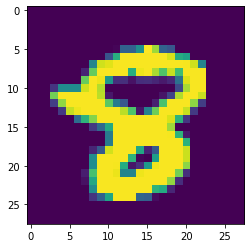

In [70]:
for batch in test_data:
    test_data_tensor = batch[0]
    prediction = model(test_data_tensor[0])
    print("label: ", torch.argmax(prediction))
    plt.imshow(test_data_tensor[0].view(28,28))
    break